<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Simpson Paradox</h1><center/>

**Link to the article** : https://medium.com/@soulawalid/simpsons-paradox-4cc8f3cf4664?source=friends_link&sk=431e2240f068e8eae29b58d312850dbe

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [12]:
np.random.seed(42)
#Group 1
group_1_x = np.random.uniform(1, 10, 50) 
group_1_y = 2 * group_1_x + np.random.normal(0, 2, 50)
#Group 2
group_2_x = np.random.uniform(1, 10, 50)  
group_2_y = -3 * group_2_x + 20 + np.random.normal(0, 2, 50)

In [13]:
df = pd.DataFrame({
    'Group': ['Group 1'] * 50 + ['Group 2'] * 50,  
    'X': np.concatenate([group_1_x, group_2_x]),  
    'Y': np.concatenate([group_1_y, group_2_y])   
})

df

,Group,X,Y
0,Group 1,4.370861,10.218655
1,Group 1,9.556429,19.455594
2,Group 1,7.587945,14.944594
3,Group 1,6.387926,12.173645
4,Group 1,2.404168,1.851292
...,...,...,...
95,Group 2,5.821972,3.216387
96,Group 2,1.812608,15.115558
97,Group 2,8.517722,-3.898801
98,Group 2,3.887021,8.364942


<Figure size 1200x600 with 0 Axes>

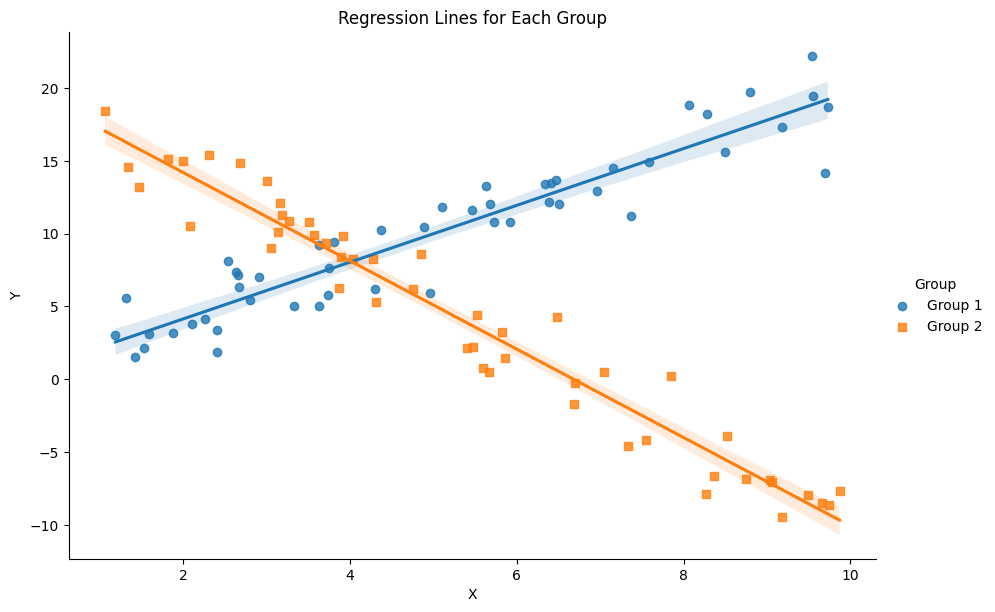

In [14]:
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='X', y='Y', hue='Group', height=6, aspect=1.5, markers=['o', 's'])
plt.title("Regression Lines for Each Group")
plt.show()

In [15]:
model = LinearRegression()  

X_combined = df[['X']]  
y_combined = df['Y']    


model.fit(X_combined, y_combined)

LinearRegression()

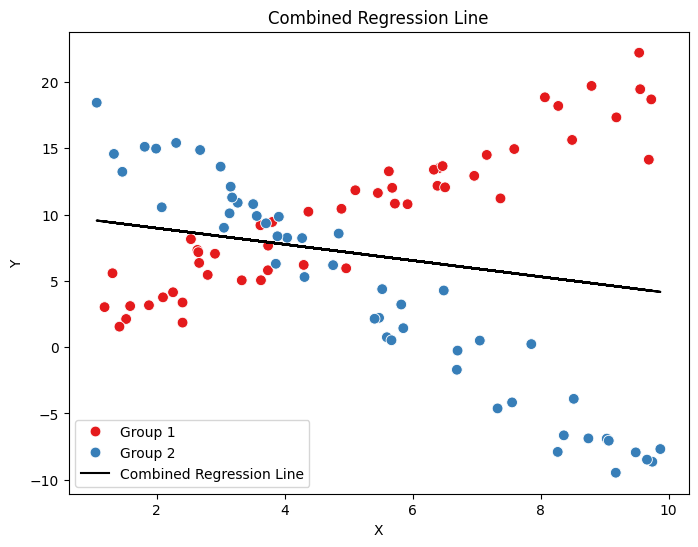

In [16]:

predicted_y = model.predict(X_combined)


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='Y', hue='Group', palette='Set1', s=60)
plt.plot(df['X'], predicted_y, color='black', label='Combined Regression Line')
plt.title("Combined Regression Line")
plt.legend()
plt.show()